# Movie Recommendation engine using Collaborative filtering and Content filtering

In [94]:
import pandas as pd
import numpy as np
import re


df_movies = pd.read_csv("movies.csv")

#creating a sample dataset of 20 rows for reference
df1 = df_movies.sample(20)
#df1

df_movies.info()

#checking duplicates
df_movies.duplicated().sum()

df_ratings = pd.read_csv("ratings.csv")
# df_ratings.head()

df_ratings.info()


# Merge the two tables based on the movieId column
df = pd.merge(df_ratings, df_movies, on='movieId')

# Preview the merged table
#df.sample(5)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    10

# seperating year from the title

In [95]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

**Timestamp**: In some cases, the timestamp can provide valuable information for collaborative filtering. For example, in a movie recommendation system, the time at which a user watched a movie can be indicative of their preferences. It can help capture temporal dynamics such as trending movies, seasonal preferences, or changing tastes over time. Incorporating the timestamp can enable the recommendation system to give more weight to recent interactions and adjust recommendations accordingly.

**Genres:** Genres can be highly relevant in collaborative filtering, especially in domains where items can be categorized into distinct genres or categories. For instance, in a movie recommendation system, users may have preferences for specific genres like action, romance, or comedy. By considering the genre information, collaborative filtering algorithms can recommend items that align with users' preferred genres. This can be particularly helpful when users have well-defined genre preferences or when they explicitly indicate their genre preferences in their profiles.

- right now im just gonna drop timestamp and genres cause its not required for this basic recommendation engine

In [69]:
df1 = df.drop(['timestamp','genres'], axis=1)

In [70]:
df1.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story
1,5,1,4.0,Toy Story
2,7,1,4.5,Toy Story
3,15,1,2.5,Toy Story
4,17,1,4.5,Toy Story


# What Next ?
- Step 1: Create a user-item matrix
- Step 2: Choose a collaborative filtering algorithm
- Step 3: Implement the collaborative filtering algorithm
* Step 4: Generate movie recommendations

- How do you determine which users or items are similar to one another?
- Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
- How do you measure the accuracy of the ratings you calculate?

In [71]:
 # Match whitespace, parentheses, and the four-digit year at the end
df1['title'] = df1['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

In [72]:
#df1.sample(10)

In [73]:
df1.isna().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

In [74]:
# set userId as the index
df1 = df1.set_index('userId')

In [66]:
#df1.head()

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [76]:
# Create a pivot table with userId as rows, movieId as columns, and ratings as values
pivot_table = pd.pivot_table(df1, values='rating', index='userId', columns='title', fill_value=0)
print(pivot_table)

title   '71  'Hellboy': The Seeds of Creation  'Round Midnight  'Salem's Lot  \
userId                                                                         
1         0                                 0              0.0             0   
2         0                                 0              0.0             0   
3         0                                 0              0.0             0   
4         0                                 0              0.0             0   
5         0                                 0              0.0             0   
...     ...                               ...              ...           ...   
606       0                                 0              0.0             0   
607       0                                 0              0.0             0   
608       0                                 0              0.0             0   
609       0                                 0              0.0             0   
610       4                             

In [61]:
# Convert the pivot table to a sparse matrix
sparse_matrix = csr_matrix(pivot_table.values)
print(sparse_matrix)

  (0, 46)	4.0
  (0, 64)	4.0
  (0, 198)	4.0
  (0, 241)	5.0
  (0, 318)	5.0
  (0, 319)	4.0
  (0, 338)	5.0
  (0, 396)	5.0
  (0, 411)	5.0
  (0, 431)	5.0
  (0, 550)	4.0
  (0, 657)	5.0
  (0, 724)	5.0
  (0, 726)	4.0
  (0, 766)	5.0
  (0, 806)	5.0
  (0, 813)	4.0
  (0, 818)	3.0
  (0, 892)	5.0
  (0, 900)	4.0
  (0, 921)	4.0
  (0, 956)	4.0
  (0, 998)	4.0
  (0, 1021)	5.0
  (0, 1035)	4.0
  :	:
  (609, 9338)	4.0
  (609, 9344)	2.5
  (609, 9345)	3.5
  (609, 9346)	1.0
  (609, 9347)	3.5
  (609, 9348)	4.0
  (609, 9349)	4.0
  (609, 9350)	3.0
  (609, 9351)	4.0
  (609, 9380)	4.5
  (609, 9396)	2.5
  (609, 9403)	4.0
  (609, 9406)	3.5
  (609, 9411)	4.0
  (609, 9420)	3.5
  (609, 9424)	5.0
  (609, 9425)	3.5
  (609, 9428)	3.5
  (609, 9432)	4.0
  (609, 9435)	4.0
  (609, 9437)	4.0
  (609, 9438)	3.5
  (609, 9439)	3.0
  (609, 9442)	2.0
  (609, 9443)	1.5


One important thing to keep in mind is that in an approach based purely on collaborative filtering, the similarity is not calculated using factors like the age of users, genre of the movie, or any other data about users or items. It is calculated only on the basis of the rating (explicit or implicit) a user gives to an item. For example, two users can be considered similar if they give the same ratings to ten movies despite there being a big difference in their age.

In [ ]:
# Calculate cosine similarity between users
user_similarity = cosine_similarity(sparse_matrix)

# Convert cosine similarity matrix to a DataFrame
similarity_df = pd.DataFrame(user_similarity, index=pivot_table.index, columns=pivot_table.index)

print(similarity_df)

# import seaborn as sns
# import matplotlib.pyplot as plt
# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(similarity_df, cmap='coolwarm', annot=True, fmt=".2f")
# plt.title("Cosine Similarity between Users")
# plt.xlabel("User ID")
# plt.ylabel("User ID")
# plt.show()


In [ ]:
# Get the index of the user for whom you want to generate recommendations
target_user_index = 10

In [ ]:
# Calculate the average rating of the target user
target_user_avg_rating = pivot_table.iloc[target_user_index].mean()

In [ ]:
# Calculate the weighted average of ratings based on user similarity
weighted_ratings = user_similarity[target_user_index].dot(pivot_table.values - target_user_avg_rating)

In [ ]:
# Create a DataFrame to store the recommendation results
recommendations = pd.DataFrame({
    'title': pivot_table.columns,
    'weighted_rating': weighted_ratings
})

In [ ]:
# Sort the recommendations by weighted rating in descending order
recommendations = recommendations.sort_values('weighted_rating', ascending=False)

In [ ]:
# Print the top 5 recommendations
top_recommendations = recommendations.head(5)
print(top_recommendations)

In [ ]:
# Calculate cosine similarity between users
user_similarity = cosine_similarity(sparse_matrix)

# Convert cosine similarity matrix to a DataFrame
similarity_df = pd.DataFrame(user_similarity, index=pivot_table.index, columns=pivot_table.index)

In [ ]:
#pivot table
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataset
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Year': [2019, 2020, 2020, 2021, 2021],
        'Sales': [100, 200, 300, 400, 500]}

df = pd.DataFrame(data)

# create a pivot table
pivot_table = df.pivot_table(index='Name', columns='Year', values='Sales')

print(pivot_table)

In [ ]:
#sparse Matrix
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

# Create a random sparse matrix
data = np.array([1, 2, 3, 4, 5])
row = np.array([0, 0, 1, 2, 2])
col = np.array([1, 2, 0, 1, 2])
sparse_matrix = csr_matrix((data, (row, col)), shape=(3, 3))

print(sparse_matrix)

# 2nd approach

In [77]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,1996-11-08,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,2005-01-25,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,2017-11-13,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,2011-05-18,Toy Story,Adventure|Animation|Children|Comedy|Fantasy


In [78]:
pattern = re.compile(r'(\d{2}/:\d{2}/:\d{2})')

In [6]:
df_time = df["timestamp"]

In [7]:
pattern = re.compile(r'(\d{2}:\d{2}:\d{2})')
for row in df_time:
    row_str = str(row)  # Convert row to string
    match = pattern.findall(row_str)
    #print(match)


In [8]:
df['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100836 entries, 0 to 100835
Series name: timestamp
Non-Null Count   Dtype         
--------------   -----         
100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


In [ ]:
# error
#df["timestamp"] = df["timestamp"].str.replace(r'(\d{2}:\d{2}:\d{2})', '', regex=True).str.strip()

In [9]:
df["timestamp"] = df["timestamp"].astype(str).str.replace(r'(\d{2}:\d{2}:\d{2})', '', regex=True).str.strip()
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
#df['title'] = df['title'].str.replace(r'(d{4})', '', regex = True).str.strip()
df['title'] = df['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

In [11]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,1996-11-08,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,2005-01-25,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,2017-11-13,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,2011-05-18,Toy Story,Adventure|Animation|Children|Comedy|Fantasy


In [25]:
#df['movieId'].groupby(by = 2)
filtered_df = df[df['movieId'] == 4]

In [27]:
filtered_df

,userId,movieId,rating,timestamp,title,genres
27260,6,4,3.0,1996-10-17,Waiting to Exhale,Comedy|Drama|Romance
27261,14,4,3.0,1996-06-22,Waiting to Exhale,Comedy|Drama|Romance
27262,84,4,3.0,1997-03-19,Waiting to Exhale,Comedy|Drama|Romance
27263,162,4,3.0,1996-07-06,Waiting to Exhale,Comedy|Drama|Romance
27264,262,4,1.0,1996-08-17,Waiting to Exhale,Comedy|Drama|Romance
27265,411,4,2.0,1996-06-23,Waiting to Exhale,Comedy|Drama|Romance
27266,600,4,1.5,2009-03-22,Waiting to Exhale,Comedy|Drama|Romance


## So it seems like movieid and titles and genres are the same. well, well, well !! goodbye to complexity and hello to simplicity. lets remove these fancy meta datas and lets just keep movieid as our primary referrence.

# Wrong Approach

In [ ]:
# #df = df['genres'].str.get_dummies(sep='|')
# df.head()

# df_genres = df['genres'].str.get_dummies(sep='|')
# df = pd.concat([df, df_genres], axis=1)

# df3 = df.drop(['genres','(no genres listed)'], axis = 1)

# shuffled_df = df3.sample(frac=1, random_state=42)

# #shuffled_df1 = shuffled_df.drop(['timestamp', 'title'], axis = 1)
# shuffled_df1 = shuffled_df.set_index('userId')

# import seaborn as sns

# shuffled_df1.info()

# Train and Test Split

In [81]:
df.head()

,movieId,rating,timestamp,title,genres
userId,,,,,
1,1,4.0,2000-07-30,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
5,1,4.0,1996-11-08,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
7,1,4.5,2005-01-25,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
15,1,2.5,2017-11-13,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
17,1,4.5,2011-05-18,Toy Story,Adventure|Animation|Children|Comedy|Fantasy


In [80]:
df = df.set_index('userId')

Choosing 42 as the random seed is a convention in the programming community, inspired by "The Hitchhiker's Guide to the Galaxy" by Douglas Adams. In the book, the number 42 is humorously suggested as the "Answer to the Ultimate Question of Life, the Universe, and Everything."

In [29]:
from sklearn.model_selection import train_test_split

In [82]:
x, y = df.drop(['rating','genres','timestamp'], axis = 1), df['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 42)

In [87]:
x_train.head()

,movieId,title
userId,,
488,168,First Knight
129,4308,Moulin Rouge
489,2690,"Ideal Husband, An"
509,8861,Resident Evil: Apocalypse
200,2012,Back to the Future Part III


# Model building

In [42]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_pca)
# pca = PCA()
# pca.fit(df_scaled)
# principal_components = pca.transform(df_scaled)
# explained_variance_ratio = pca.explained_variance_ratio_
# explained_variance_ratio
# df_pca = x_train.drop('movieId', axis = 1)





In [47]:
x_train_sample = x_train.sample(10)

In [63]:
#similarity_matrix = cosine_similarity(x_train)

## Alright, buckle up for some data fun!

- Imagine you're dealing with a massive dataset of 7000 points, and you want to compute cosine similarity. But oh no, it's like trying to fit an elephant into a clown car – it just won't work!
- But fear not, my friend! There's a clever trick to tackle this challenge. First, we create a pivot table, which is like transforming your data into a fancy table where movies become rows and genres become columns. It's like giving your dataset a snazzy makeover!
- Next, we convert this pivot table into a sparse matrix. Think of it as a special diet for your data – it cuts down on memory munching by storing only the important stuff (non-zero values). Say goodbye to excess baggage!
- Now, armed with this compact and efficient sparse matrix, we unleash the power of cosine similarity. It's like finding soulmates for your movies based on their genre vibes. Cosine similarity swoops in and computes how closely related the movies are, making recommendations a piece of cake!
- To sum it up, pivot tables and sparse matrices are your secret weapons for taming large datasets and rocking cosine similarity. 🎥🚀

In [85]:
from scipy.sparse import csr_matrix

In [86]:
pivot_table = pd.pivot_table(x_train, values='ratings', index='userId', columns='title', fill_value=0)
print(pivot_table)

KeyError: 'rating'

In [ ]:
# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=x_train.index, columns=x_train.index)

In [ ]:
# Function to get top k similar users for a given user
def get_similar_users(user_id, k=5):
    similar_users = similarity_df.loc[user_id].nlargest(k+1).index[1:]
    return similar_users

In [ ]:
# Function to predict ratings for a given user and item
def predict_rating(user_id, movie_id, k=5):
    similar_users = get_similar_users(user_id, k)
    ratings = []
    
    for user in similar_users:
        rating = x_train.loc[user, movie_id]
        ratings.append(rating)
    
    predicted_rating = np.mean(ratings)
    return predicted_rating

In [ ]:
# Predict ratings for x_test
predicted_ratings = []

for i, row in x_test.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    predicted_rating = predict_rating(user_id, movie_id, k=5)
    predicted_ratings.append(predicted_rating)

# Convert the predicted ratings to a numpy array
predicted_ratings = np.array(predicted_ratings)

initialize object and do a fit operation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop the necessary features from the dataset
x, y = df.drop(['rating','title','genres','timestamp'], axis = 1), df['rating']


In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
# Perform standardization on the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
# # Perform PCA on the standardized features
# pca = PCA()
# principal_components = pca.fit_transform(x_train_scaled)
# explained_variance_ratio = pca.explained_variance_ratio_

# principal_components_with_columns = pd.DataFrame(data=principal_components, index=x_train.index)
# principal_components_with_columns

# Add the dropped columns back to the principal components
# principal_components_with_columns = pd.DataFrame(data=principal_components, index=x_train.index)
# principal_components_with_columns = pd.concat([principal_components_with_columns, x_train[drop_columns]], axis=1)

In [ ]:
# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(principal_components_with_columns)

In [ ]:


# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=x_train.index, columns=x_train.index)

# Function to get top k similar users for a given user
def get_similar_users(user_id, k=5):
    similar_users = similarity_df.loc[user_id].nlargest(k+1).index[1:]
    return similar_users

# Function to predict ratings for a given user and item
def predict_rating(user_id, movie_id, k=5):
    similar_users = get_similar_users(user_id, k)
    ratings = []

    for user in similar_users:
        rating = x_train.loc[user, movie_id]
        ratings.append(rating)

    predicted_rating = np.mean(ratings)
    return predicted_rating

# Predict ratings for x_test
predicted_ratings = []

for i, row in x_test.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    predicted_rating = predict_rating(user_id, movie_id, k=5)
    predicted_ratings.append(predicted_rating)

# Convert the predicted ratings to a numpy array
predicted_ratings = np.array(predicted_ratings)


# 3rd Approach

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [96]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [99]:
# Sample user-item ratings matrix
user_item_matrix = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_item_matirx = ratings.astype(np.float32)

In [115]:
#user_item_matrix.values

In [102]:
# Convert the user-item ratings matrix to a sparse matrix
sparse_matrix = csr_matrix(user_item_matrix.values)

In [114]:
#print(sparse_matrix)

In [107]:
# Compute the cosine similarity between items
item_similarities = cosine_similarity(sparse_matrix.T)

In [116]:
#item_similarities

In [111]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[['userId', 'movieId']].values, df['rating'].values, test_size=0.2, random_state=42)

In [112]:
# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

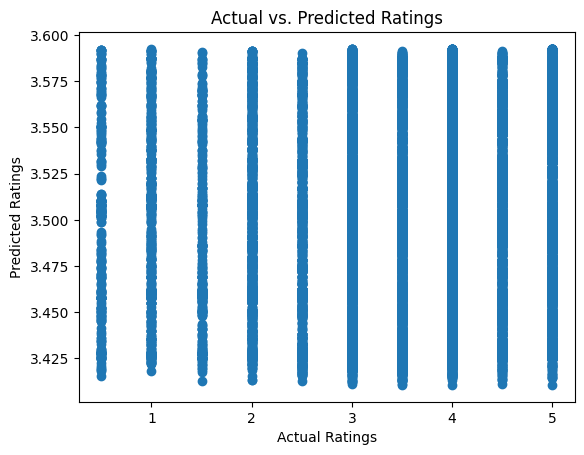

In [113]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Create a scatter plot of actual vs. predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()


In [117]:
def hybrid_recommendation(user_id, top_n=5):
    # Get the user's ratings
    user_ratings = user_item_matrix.loc[user_id]

    # Compute the weighted average of ratings based on item similarities
    weighted_ratings = item_similarities.dot(user_ratings)

    # Find the indices of top-rated items from collaborative filtering
    top_indices_cf = np.argsort(weighted_ratings)[::-1][:top_n]

    # Predict the ratings for new user-movie combinations using regression
    all_movie_ids = df['movieId'].unique()
    user_movie_ids = user_item_matrix.columns[user_item_matrix.loc[user_id] == 0]
    new_user_movie_ids = np.setdiff1d(all_movie_ids, user_movie_ids)
    new_user_ids = np.full(new_user_movie_ids.shape[0], user_id)
    new_user_movie_ratings = regression_model.predict(np.column_stack((new_user_ids, new_user_movie_ids)))
    top_indices_regression = new_user_movie_ratings.argsort()[::-1][:top_n]

    # Get the corresponding movie titles
    top_movies_cf = df[df['movieId'].isin(top_indices_cf)]['title'].unique()
    top_movies_regression = df[df['movieId'].isin(top_indices_regression)]['title'].unique()

    return np.concatenate((top_movies_cf, top_movies_regression))


In [121]:

# Example usage
user_id = 100
top_movies = hybrid_recommendation(user_id, top_n=5)
print(f"Recommended movies for user {user_id}:")
for movie in top_movies:
    print(movie)


Recommended movies for user 100:
Glimmer Man, The (1996)
Candleshoe (1977)
Inspector General, The (1949)
Toy Story (1995)
Grumpier Old Men (1995)
Jumanji (1995)
Waiting to Exhale (1995)


In [123]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = regression_model.predict(x_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.0345693528632527


In [128]:
df_pred = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})


In [129]:
df_pred.sample(20)

,y_test,y_pred
13375,5.0,3.578131
12990,5.0,3.564164
10461,3.5,3.437853
2773,4.5,3.537292
8797,3.5,3.525664
1907,3.0,3.425395
16676,2.0,3.478842
4804,4.0,3.456813
5749,2.5,3.427810
15756,4.0,3.474109
